In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model 
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model



Using TensorFlow backend.
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [5]:
df = pd.read_csv("dataset/used car/car.csv" , error_bad_lines=False , warn_bad_lines=False) #read dataset 
print("data frame length",df.shape)
print("data frame types: \n",df.dtypes)

FileNotFoundError: [Errno 2] File dataset/used car/car.csv does not exist: 'dataset/used car/car.csv'

In [66]:
df.head() #show first 5 rows

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [4]:
df.shape

(1216247, 9)

In [67]:
df=df.drop(columns=['City','State','Vin'])

In [68]:
df=pd.concat([df, pd.get_dummies(df.Model),pd.get_dummies(df.Make)], axis=1)
df.shape

(1216247, 3169)

In [69]:
shuffled = df.sample(frac=1)
result = np.array_split(shuffled, 5)  

In [70]:
df.shape

(1216247, 3169)

In [71]:
result[0].to_pickle("df0")  
result[1].to_pickle("df1")  
result[2].to_pickle("df2")  
result[3].to_pickle("df3")  
result[4].to_pickle("df4")



***********************
***************************
*********************

In [2]:
df = pd.read_pickle("df4")

In [3]:
df.head()

,Id,Price,Year,Mileage,Make,Model,1,124,1500,"1500**7""",...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
471713,477083,3900,2007,147166,Chevrolet,Cobalt2dr,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1116941,1132073,12488,2015,49832,Toyota,CorollaLE,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
794009,799379,12777,2016,35068,Hyundai,Sonata2.4L,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280807,280808,15300,2015,53267,Nissan,RogueS,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018740,1024111,13950,2015,21489,Nissan,SentraSV,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y=df['Price']
X=df.drop(columns=['Id','Price','Make','Model'])


In [5]:
X.head()

,Year,Mileage,1,124,1500,"1500**7""",15002WD,15004WD,1500Big,1500Express,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
471713,2007,147166,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1116941,2015,49832,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
794009,2016,35068,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280807,2015,53267,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018740,2015,21489,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X.shape

(243249, 3164)

In [7]:
y.shape

(243249,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 )#, random_state=123)

In [9]:
X_train.shape

(218924, 3164)

In [10]:
X_test.shape

(24325, 3164)

In [11]:
y_train.shape

(218924,)

In [12]:
y_test.shape

(24325,)

In [13]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1], ), activation='relu', name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_2'))
model.add(Dense(128, activation='relu', name='dense_3'))
model.add(Dense(64, activation='relu', name='dense_4'))
model.add(Dense(64, activation='relu', name='dense_5'))
model.add(Dense(32, activation='relu', name='dense_6'))
model.add(Dense(64, activation='relu', name='dense_7'))
model.add(Dense(16, activation='relu', name='dense_8'))
model.add(Dense(8, activation='relu', name='dense_9'))
model.add(Dense(64, activation='relu', name='dense_10'))
model.add(Dense(1, activation='relu', name='dense_output'))
#model.compile(optimizer='adam', loss='mse', metrics=['mae','accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               405120    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [14]:
opt = keras.optimizers.Adam(lr=0.5)
#model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
model.compile(loss='mean_absolute_error', optimizer="Adam", metrics=['mean_absolute_error'])


<h1> ******************** </h1>

In [13]:
model = load_model('my_model.h5')

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
############################################################# use it for RESET

Instructions for updating:
non-resource variables are not supported in the long term


In [16]:
model_history=model.fit(X_train, y_train ,epochs=5, batch_size=8, validation_split = 0.1)


Train on 197031 samples, validate on 21893 samples
Epoch 1/5


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(8, 3164), b.shape=(3164, 128), m=8, n=128, k=3164
	 [[{{node dense_1/MatMul}}]]
	 [[Mean/_227]]
  (1) Internal: Blas GEMM launch failed : a.shape=(8, 3164), b.shape=(3164, 128), m=8, n=128, k=3164
	 [[{{node dense_1/MatMul}}]]
0 successful operations.
0 derived errors ignored.

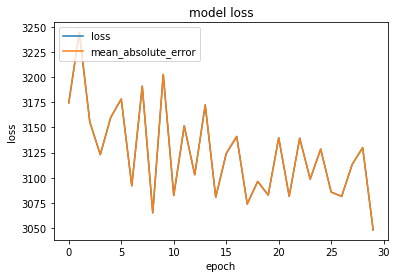

In [96]:

'''fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()'''

import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['mean_absolute_error'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mean_absolute_error'], loc='upper left')
plt.show()

In [87]:
model.evaluate(X_test,y_test)

24325/24325 [==============================] - 2s 103us/step


[2903.4672938529757, 2903.4677734375]

In [97]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [5]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [12]:

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [8]:
config = tf.ConfigProto(
device_count={'GPU': 1},
intra_op_parallelism_threads=1,
allow_soft_placement=True
)

config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.6

session = tf.Session(config=config)
keras.backend.set_session(session)

In [11]:

def getres(x,dic):
    pred=x
    pred.values[:] = 0
    pred['Year']=int(dic["year"])
    pred['Mileage']=int(dic["mileage"])
    pred[dic["make"]]=1
    pred[dic["model"]]=1
    with session.as_default():
        with session.graph.as_default():
            res=model.predict(np.array(pred).reshape(1,3164))[0][0]
    return res 
getres(X_test.iloc[2],{'make': 'Chevrolet', 'model': 'Malibu', 'mileage': '50000', 'year': '2020'})

13240.802

In [ ]:
from flask import Flask, request, make_response
import json
import time

app = Flask(__name__)
@app.route('/', methods=['POST'])
def index():
   
    skelet=X_test.iloc[2]
    
    d = request.form.to_dict() # data recived from form
   
    #pred_array=getpred(skelet,d)
    
    result=getres(skelet,d)
    
    
        
        
    data=make_response(json.dumps({"price":int(result)})) # transform final result to json
    resp=data
    resp.status_code = 200
    resp.headers['Access-Control-Allow-Origin'] = '*' # configiration 

    print(d)
    print(result)
    
    return resp


    
    
    
if __name__ == "__main__":
    app.run()
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Nov/2020 01:49:15] "POST / HTTP/1.1" 200 -


{'make': 'Volkswagen', 'model': 'Golf2013', 'mileage': '50000', 'year': '2013'}
14582.311


127.0.0.1 - - [23/Nov/2020 01:49:45] "POST / HTTP/1.1" 200 -


{'make': 'Volkswagen', 'model': 'Golf2013', 'mileage': '50000', 'year': '2013'}
14582.311


In [92]:
len(X_test.iloc[0])

3164

11538.465

In [83]:
X_test.shape

(24325, 3164)

In [42]:
dic["make"]

'Ford'

In [68]:
pred['Year']

2014

In [110]:
skelet=X_test.iloc[2]
d = {'make': 'Chevrolet', 'model': 'Malibu', 'mileage': '50000', 'year': '2020'}
pred_array=getpred(skelet,d)
result=model.predict(np.array(pred_array).reshape(1,len(skelet)))[0][0]
result


13240.802

13240.802

In [97]:
#get_model_memory_usage(1024,model)

0.003

In [20]:
def get_model_memory_usage(batch_size, model):
    import numpy as np
    try:
        from keras import backend as K
    except:
        from tensorflow.keras import backend as K

    shapes_mem_count = 0
    internal_model_mem_count = 0
    for l in model.layers:
        layer_type = l.__class__.__name__
        if layer_type == 'Model':
            internal_model_mem_count += get_model_memory_usage(batch_size, l)
        single_layer_mem = 1
        out_shape = l.output_shape
        if type(out_shape) is list:
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_count = np.sum([K.count_params(p) for p in model.non_trainable_weights])

    number_size = 4.0
    if K.floatx() == 'float16':
        number_size = 2.0
    if K.floatx() == 'float64':
        number_size = 8.0

    total_memory = number_size * (batch_size * shapes_mem_count + trainable_count + non_trainable_count)
    gbytes = np.round(total_memory / (1024.0 ** 3), 3) + internal_model_mem_count
    return gbytes

In [2]:
a=int(input("donner a "))
if (a>0):
    print(a," est psitive")
else:
     print(a," est negative")

donner a  -45


-45  est negative
